# 종합실습3 이변량분석(y-범주) : 직원 이직 분석

![](https://www.talentalign.com/wp-content/uploads/2019/09/main-qimg-2434943004743f79c0abf540cb4f6e2c-cropped.jpg)

* 직원 이직 분석
    * 회사에서 최근 1~2년 사이 이직률이 상승하였습니다. 
    * 여러분은, 직원들이 이직하는데 중요한 요인이 무엇인지 데이터를 기반으로 한 분석을 의뢰 받았습니다.

# 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.

In [2]:
# 직원 이직 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple2.CSV'
data = pd.read_csv(path)  
data.head(5)

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


> * 변수설명
    * Attrition	:	이직여부, Yes , No (Target)
    * Age	:	나이
    * DistanceFromHome	:	집-직장 거리(마일)
    * EmployeeNumber	:	사번
    * Gender	:	성별(Male, Female)
    * JobSatisfaction	:	직무 만족도, 다음시트 참조
    * MaritalStatus	:	결혼상태(Married, Single, Divorced)
    * MonthlyIncome	:	월급(달러)
    * OverTime	:	야근여부
    * PercentSalaryHike	:	전년대비 급여인상율(%)
    * TotalWorkingYears	:	총 근무 연수



# 2.범주-->범주

In [3]:
target = 'Attrition'

## (1) Gender --> Attrition

In [4]:
feature = 'Gender'

* 교차표

In [12]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

Age,18,19,20,21,22,23,24,25,26,27,...,51,52,53,54,55,56,57,58,59,60
Attrition,,,,,,,,,,,,,,,,,,,,,
0,4,1,3,4,10,9,14,14,23,36,...,10,12,14,14,15,11,4,6,9,4
1,4,5,5,4,5,4,5,5,11,1,...,2,3,2,0,3,2,0,3,0,0


In [6]:
pd.crosstab(data[target], data[feature], normalize = 'columns')
# 1이 이직임
# 근데 도메인 지식 하나. 이직은 0~100 %로 보는 게 아니고 
# 아래 경우처럼 0.14 -> 0.17이면 3%나 올랐네? 하는거임. 이직률은 그래. ㅇㅇ

Gender,Female,Male
Attrition,,
0,0.859275,0.822558
1,0.140725,0.177442


* 시각화

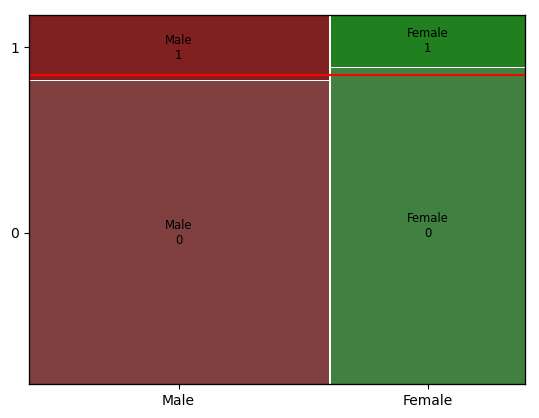

In [7]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [8]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1]) # 0.05보다 낮으니 관련이 없다고 생각해도 되는데 이직률의 계산을 생각하면 또... 아닌가? 걍 관련이 없다고 생각하긴 해요..
print('기대빈도\n',result[3])

교차표
 Gender     Female  Male
Attrition              
0             403   598
1              66   129
----------------------------------------------------------------------------------------------------
카이제곱통계량 2.5537631338119975
p-value 0.1100318964829815
기대빈도
 [[392.5326087 608.4673913]
 [ 76.4673913 118.5326087]]


* 파악된 내용을 기술해 봅시다.

## (2) JobSatisfaction --> Attrition

* 교차표

In [20]:
feature = 'JobSatisfaction'
target = 'Attrition'
# 두 범주별 빈도수를 교차표로 만들어보자.
pd.crosstab(data[target], data[feature])

JobSatisfaction,1,2,3,4
Attrition,,,,
0,191,189,295,326
1,52,37,59,47


* 시각화

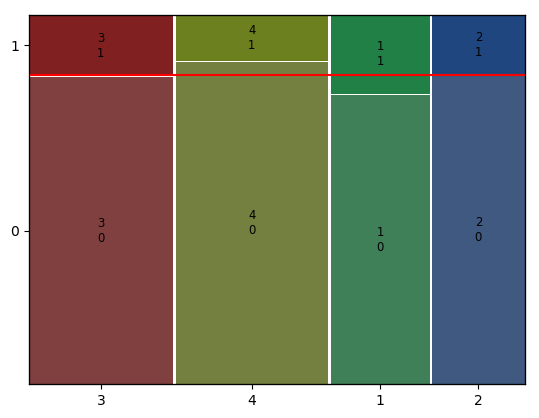

In [21]:
mosaic(data, [feature, target])
plt.axhline(1 - data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [22]:
# 카이제곱검정
spst.chi2_contingency(pd.crosstab(data[feature], data[target]))

(8.40684948576828,
 0.0383107376547955,
 3,
 array([[203.38043478,  39.61956522],
        [189.15217391,  36.84782609],
        [296.2826087 ,  57.7173913 ],
        [312.18478261,  60.81521739]]))

* 파악된 내용을 기술해 봅시다.

In [ ]:
# 자유도 3 * 2 = 6인데 카이제곱검정 통계량이 더 큼. 관련이 있다
#  p value 0.05보다 작다, 관련 적다

## (3) MaritalStatus --> Attrition

* 교차표

* 시각화

* 수치화 : 카이제곱검정

* 파악된 내용을 기술해 봅시다.

## (4) OverTime --> Attrition

* 교차표

* 시각화

* 수치화 : 카이제곱검정

* 파악된 내용을 기술해 봅시다.

# 3.숫자-->범주

## (1) Age --> Attrition

In [9]:
feature = 'Age'

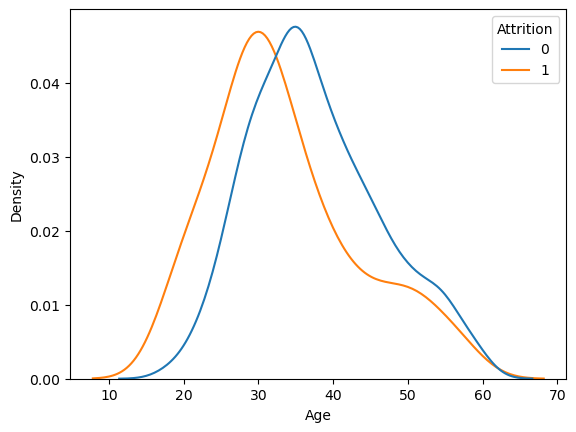

In [10]:
sns.kdeplot(x= feature, data = data, hue = target, 
            common_norm = False) # 관련이 있어 보이네.. 젊은 사람들은 이직률이 높고 나이가 많으면 이직률이 낮고
plt.show()

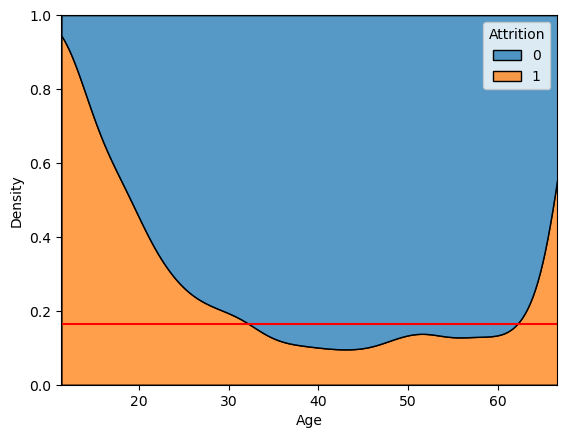

In [11]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

## (2) DistanceFromHome --> Attrition

In [ ]:
# 집에서 회사까지의 거리 -> 가까울수록 이직률이 낮다.
# eda2_nc(data, target, 'DistanceFromHome')

* 파악된 내용을 기술해 봅시다.

## (3) MonthlyIncome --> Attrition

* 파악된 내용을 기술해 봅시다.

## (4) PercentSalaryHike --> Attrition

* 파악된 내용을 기술해 봅시다.

## (5) TotalWorkingYears --> Attrition

* 파악된 내용을 기술해 봅시다.

# 4.관계 정리하기

① 강한관계

② 중간관계

③ 관계없음

In [23]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [26]:
spst.pearsonr(data['tax'], data['medv'])

PearsonRResult(statistic=-0.4685359335677671, pvalue=5.637733627689083e-29)